## Understanding USArrests data using PCA

### Introduction

This data contains statistics, in arrests per 100 000 residents for assault, murder and rape in each of the 50 US states in 1973. Also given is the percent of the population living in urban areas. 

A dataframe with 50 observations on 4 features, and all these features contain numeric data.
1. Feature 'Murder'contains murder arrests (per 100,000 residents).

2. Feature 'Assault' contains assault arrests (per 100,000)

3. Feature 'UrbanPop' contains percent of urban population

4. Feature 'Rape' contains rape arrests (per 100,000)



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Load data
df = pd.read_csv('UsArrests.csv', index_col=0)

In [3]:
# Display the first 5 rows/ observations
df.head()

,Murder,Assault,UrbanPop,Rape
City,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


We can see the 1st 5 cities with the examined features.

In [4]:
# Let us check for dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


The information above shows us that there are no missing values on any feature, and all features contain numeric data.

Now, let us visualize the data distribution using the box-and-whisker visualization. 

In [5]:
# Looking into data description
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


We can graphically represent the data description for easier comparison of the four features.


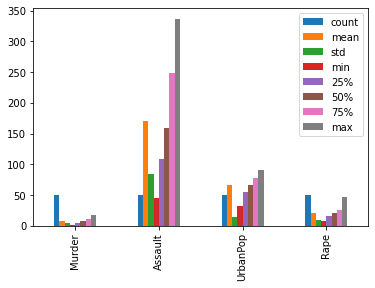

In [10]:

df.describe(include='all').T.plot.bar()

We notice that the features have vastly different means [Murder, Assault, UrbanPop, Rape] : [7.78, 170.76, 65.54, 21.23], as well as vastly different standard deviations (square root of variance).
    These differences makes it quite a challenge to compare the varibales with each other. For example, the UrbanPop variable measures the percentage of urban population in each state but its number is not comparable to the number of rapes in each state per 100,000 residents. 
    
    
Let us present our data distribution visually using plt.boxplot() library, so we get a visual picture of how the data points in each feature  are variated from their means.   

Text(0.5, 1.0, 'Data Distribution of the Four Features')

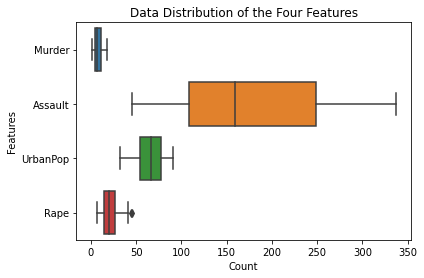

In [11]:
# df.boxplot()
# plt.xlabel('Features')
# plt.ylabel('Count')
# plt.title('Data Distribution of the Four Features')

sns.boxplot(data=df, orient='h')
plt.ylabel('Features')
plt.xlabel('Count')
plt.title('Data Distribution of the Four Features')


We can see that even though it is a challenge to compare the features among each other, but they each have little/ no outliers.

It is safe to assume that there is little number of murder cases, in all the cities combined, compared to the other three features and these cities have relatively not too different number of murder cases reported (since the plot shows even distribution of the data points).

It seems like the cities have the highest number of assault cases than the other three variables. The plot shows positive skewness, and that suggests that most of the data points are above the mean of 170.76. The lowest number of assault cases is 45, and the highest is 337.

The UrbanPop variable seem to have data points that are evenly distributed.

The Rape variable seem to also have data points that are evenly distributed.


Now, let us explore graphically the relationship among all these variables using seaborn.pairplot() library.

Data Distribution of all Four Features with their pairwise relationships


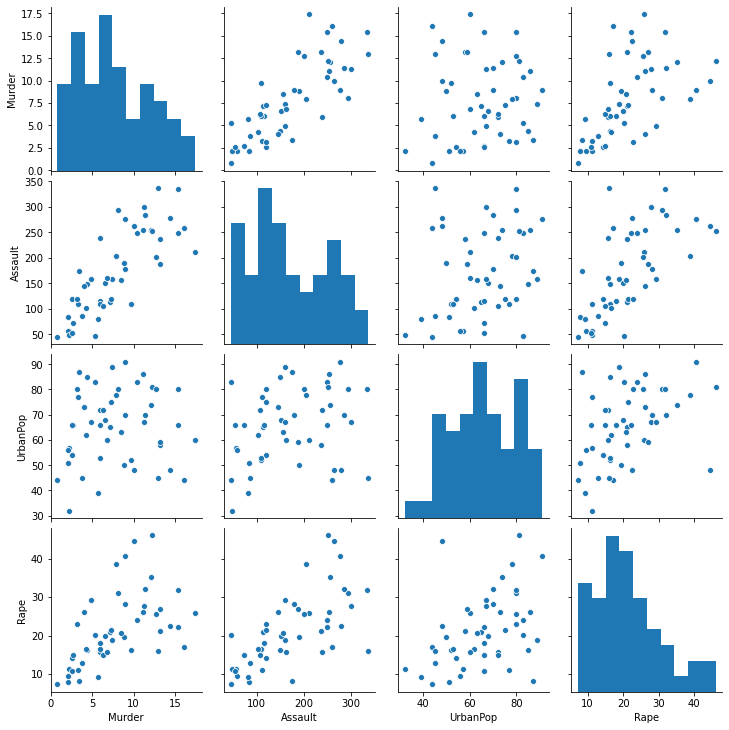

In [12]:
# sort_by_urbanpop
sns.pairplot(df)
print('Data Distribution of all Four Features with their pairwise relationships')

There seem to be distinct positive linear relations between the Murder and Assault features. This suggests that these two change in the same direction.

Murder and UrbanPop & Assault and UrbanPop have no established relations whatsoever. 

Rape and UrbanPop also show positive relations meaning that changes in either of these two will suggest a change in the direction of the other. 



Now, let us graphically show how the Assault, Murder and Rape features react with descending urban population. We use plt.df.plot.barh() to visualize this.


In [13]:
# Rearrange df to descending urban population size
sort_by_urbanpop = df.sort_values('UrbanPop', ascending=False)
# Print the first 10 observations
sort_by_urbanpop.head(10)

,Murder,Assault,UrbanPop,Rape
City,,,,
California,9.0,276,91,40.6
New Jersey,7.4,159,89,18.8
Rhode Island,3.4,174,87,8.3
New York,11.1,254,86,26.1
Massachusetts,4.4,149,85,16.3
Hawaii,5.3,46,83,20.2
Illinois,10.4,249,83,24.0
Nevada,12.2,252,81,46.0
Texas,12.7,201,80,25.5


Text(0.5, 1.0, 'Top 10 Cities with The Largest Urban Population')

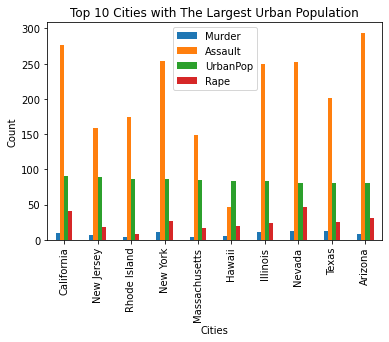

In [14]:
sort_by_urbanpop.head(10).plot.bar()
plt.xlabel('Cities')
plt.ylabel('Count')
plt.title('Top 10 Cities with The Largest Urban Population')

The plot above shows 10 cities/ states with the largest urban population. We deduce that Arizona has the least urban population among the others shown above, but has the highest number of assault cases,
Texas with the highest murder cases, Nevada with the highest rape cases. Hawaii is one of the cities with the biggest population in their urban states, but there seem to be averaged reported cases on all the three features murder, rape and assault.


### Principal Components Analysis

Remember that all the features have vastly different means and variances. This means that we have to scale our data before performing PCA, so the variables have mean of zero standard deviation of one.
 By doing so, these features will be comparable to each other and the principal components will be driven by all the four features evenly (not only by the Assault variable since it has the highest mean and standard deviation).
    

We will scale the data using scale() function from sklearn:
    

In [77]:
from sklearn.preprocessing import scale, StandardScaler


In [92]:
#X = pd.DataFrame(StandardScaler().fit_transform(df), index=df.index, columns=df.columns)

df_scaled = pd.DataFrame(StandardScaler().fit_transform(df), index=df.index, columns=df.columns)

Now, we can perform PCA.

In [93]:
from sklearn.decomposition import PCA

In [94]:
# pca = PCA()
# pca.fit(df_scaled)

In [95]:
# pca.explained_variance_ratio_

In [96]:
pca_loadings = pd.DataFrame(PCA().fit(df_scaled).components_.T, index=df.columns, columns=['V1', 'V2', 'V3', 'V4'])
pca_loadings

,V1,V2,V3,V4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


There are four distinct principal components.
 
We now use fit_transform() function to get the principal component scores of the original data. 

In [98]:
# Fit the PCA model and transform X to get the principal components

pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(df_scaled), columns=['PC1', 'PC2', 'PC3', 'PC4'], index=df_scaled.index)
df_plot.head()

,PC1,PC2,PC3,PC4
City,,,,
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996


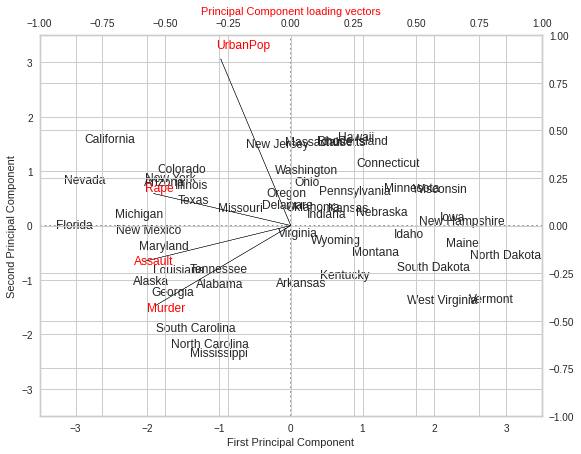

In [99]:
fig, ax1 = plt.subplots(figsize=(9, 7))

ax1.set_xlim(-3.5, 3.5)
ax1.set_ylim(-3.5, 3.5)

# Plot Principal Components 1 and 2
for i in df_plot.index:
    ax1.annotate(i, (-df_plot.PC1.loc[i], -df_plot.PC2.loc[i]), ha='center')
    
# Plot reference lines
ax1.hlines(0, -3.5, 3.5, linestyles='dotted', colors='grey')
ax1.vlines(0, -3.5, 3.5, linestyles='dotted', colors='grey')

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')

# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny()

ax2.set_ylim(-1, 1)
ax2.set_xlim(-1, 1)
ax2.set_xlabel('Principal Component loading vectors', color='red')

# Plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow and 
a = 1.07
for i in pca_loadings[['V1', 'V2']].index:
    ax2.annotate(i, (-pca_loadings.V1.loc[i]*a, -pca_loadings.V2.loc[i]*a), color='red')
    
# Plot vectors
ax2.arrow(0, 0, -pca_loadings.V1[0], -pca_loadings.V2[0])
ax2.arrow(0, 0, -pca_loadings.V1[1], -pca_loadings.V2[1])
ax2.arrow(0, 0, -pca_loadings.V1[2], -pca_loadings.V2[2])
ax2.arrow(0, 0, -pca_loadings.V1[3], -pca_loadings.V2[3])




The plot above is the biplot of the first two principal components using the loading vectors.


Now, let us print out the variance explained by each principal component.


In [100]:
pca.explained_variance_

array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

Let us print the proportions of variance explained by the principal components.

In [101]:
pca.explained_variance_ratio_ *100

array([62.00603948, 24.74412881,  8.91407951,  4.33575219])

We see that the first principal component explains 62 percent of the variance in the data, the second principal component explains 24.7 percent of the variance, the third one explains 8.9 percent of the variance while the last principal component explains only 4.3 percent of the variance. 

We can graphically present these proportions.

([<matplotlib.axis.XTick at 0x7f98fbd69790>,
 <a list of 4 Text major ticklabel objects>)

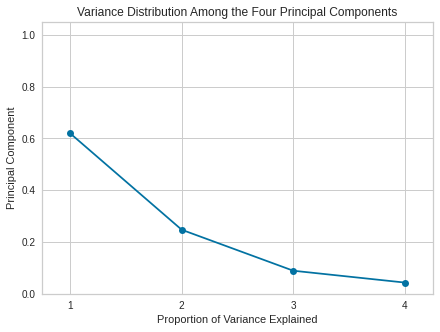

In [102]:
plt.figure(figsize=(7, 5))
plt.plot([1, 2, 3, 4], pca.explained_variance_ratio_, '-o')
plt.xlabel('Proportion of Variance Explained')
plt.ylabel('Principal Component')
plt.title('Variance Distribution Among the Four Principal Components')
plt.xlim(0.75, 4.25)
plt.ylim(0, 1.05)
plt.xticks([1, 2, 3, 4])

The plot above visually shows us how much variance each of the four principal components explain.
 We note that the first principal component explains above 60 percent of the variance while the fourth one explains less than 5 percent of the variance.
    
    
We could also represent these variance proportions with the cumulative sum of the elements, using cumsum() function.


([<matplotlib.axis.XTick at 0x7f98fbc6d610>,
 <a list of 4 Text major ticklabel objects>)

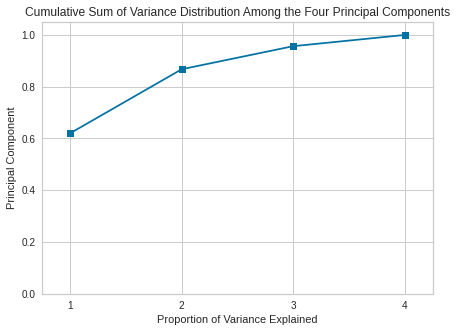

In [103]:
plt.figure(figsize=(7, 5))
plt.plot([1, 2, 3, 4], np.cumsum(pca.explained_variance_ratio_), '-s')
plt.xlabel('Proportion of Variance Explained')
plt.ylabel('Principal Component')
plt.title('Cumulative Sum of Variance Distribution Among the Four Principal Components')
plt.xlim(0.75, 4.25)
plt.ylim(0, 1.05)
plt.xticks([1, 2, 3, 4])

To perform Kmeans clustering, we only need the calculated resulting components scores for the elements in our dataset.


In [104]:
df_scaled_std = StandardScaler().fit_transform(df)

scores_pca = pca.transform(df_scaled_std)

These newly obtained PCA scores allows us to perform segmentation based on principal components scores instead of the original features.


### Kmeans Clustering 

K-means is an unsupervised clustering algorithm designed to partition unlabelled data into a certain number ('K') of distinct groupings. i.e. k-means finds observations that share important characteristics and classifies them together into clusters. A good clustering solution is one that finds clusters such that the observations within each cluster are more similar than the clusters themselves. 


We ourselves have to determine the number of clusters in a K-means algorithm. But we have to run the algorithm with a different number of clusters, then determine the Within Cluster Sum of Squares (WCSS) for each solution. Based on the values of the WCSS and the Elbow method, we make a decision about how many clusters we would to keep.

But, we first decide how many clustering solutions we'd test.

In [25]:
from sklearn.cluster import KMeans

#### K-means clustering with PCA

In [107]:
# We fit k-means using the transformed data from the PCA.
WCSS = []
for i in range(1,21):
    kmeans_pca = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans_pca.fit(scores_pca)
    WCSS.append(kmeans_pca.inertia_)
    

We then plot the WCSS against the number of components on a graph.


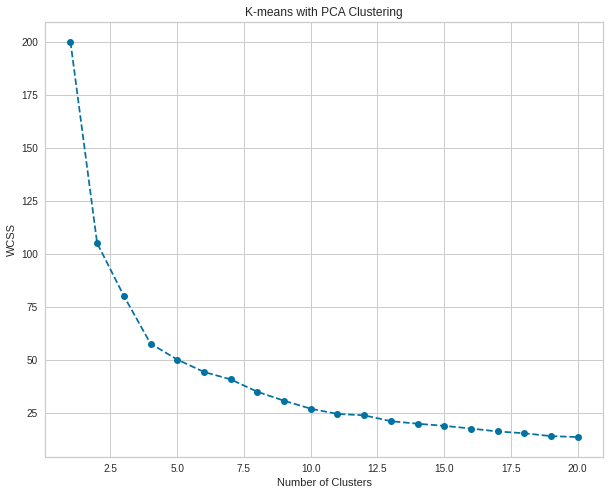

In [108]:
plt.figure(figsize=(10, 8))
plt.plot(range(1,21), WCSS, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

Or we can use KElbowVisualizer() function which also implements the Elbow method.


In [110]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import accuracy_score, silhouette_score


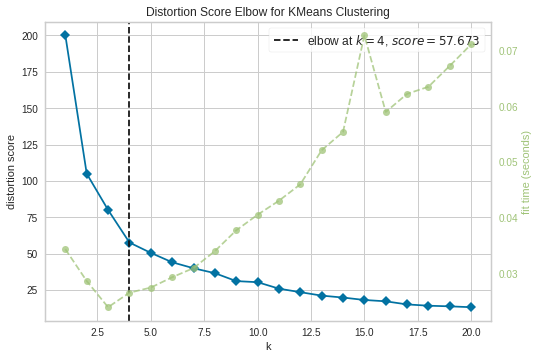

In [111]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1, 21)) 
visualizer.fit(scores_pca)
visualizer.poof()

The distortion score computes the sum of sqaured distances from each point to its assigned center. 
    We note that K = 4 is the optimal number of clusters we could use for our model. 
    

Now we implement the model.

In [112]:
kmeans_pca = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

Now that we have fit our data points to the model, we can analyze the results of our algorithm.


In [125]:
# We create a checkpoint. 
df_pca_kmeans = pd.concat([df.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
df_pca_kmeans.columns.values[-4:] = ['Component 1', 'Component 2', 'Component 3', 'Component 4']
df_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

df_pca_kmeans['Segment'] = df_pca_kmeans['Segment K-means PCA'].map({0:'first',
                                                                    1:'second',
                                                                    2:'third',
                                                                    3:'fourth'})


In [126]:
df_pca_kmeans.head()

,Murder,Assault,UrbanPop,Rape,Component 1,Component 2,Component 3,Component 4,Segment K-means PCA,Segment
0,13.2,236,58,21.2,0.985566,1.133392,-0.444269,0.156267,0,first
1,10.0,263,48,44.5,1.950138,1.073213,2.040003,-0.438583,3,fourth
2,8.1,294,80,31.0,1.763164,-0.745957,0.054781,-0.834653,3,fourth
3,8.8,190,50,19.5,-0.141420,1.119797,0.114574,-0.182811,0,first
4,9.0,276,91,40.6,2.523980,-1.542934,0.598557,-0.341996,3,fourth


We can now visualize the segments with repsect to the first two principal components since they explain more variance than the third and fourth ones.


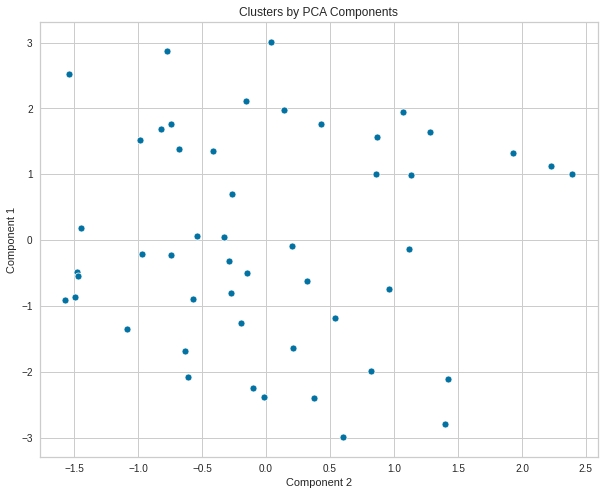

In [129]:
# Plot data by PCA components. y-axis is the first component, x-axis is the second component.
plt.figure(figsize=(10,8))
sns.scatterplot(df_pca_kmeans['Component 2'], df_pca_kmeans['Component 1'], palette=['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components')
plt.show()

The diagram above shows only one cluster with data points scattered all over. 


### Hierarchical Clustering

In [135]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import accuracy_score, silhouette_score


In [140]:
df_scaled.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

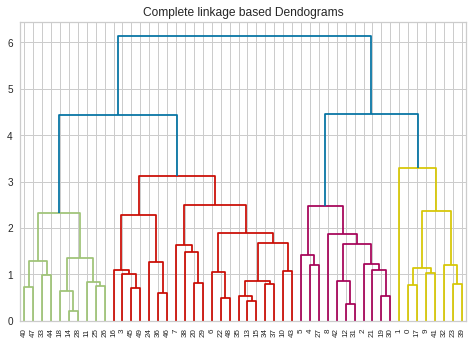

In [147]:
plt.title("Complete linkage based Dendograms")  
dend = dendrogram(linkage(df_scaled, method='complete'))  

The linkage method takes the scaled dataset and minimises distances as parameters. The vertical height or lines corresponds to the euclidean distance between clusters.


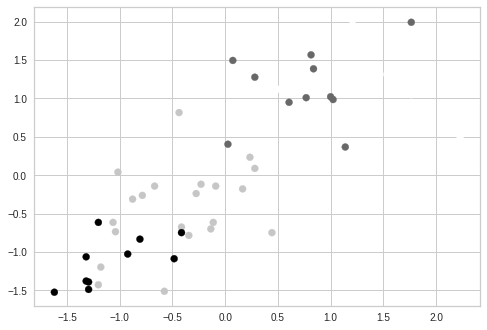

In [150]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')
cluster.fit_predict(df_scaled)
plt.scatter(df_scaled.iloc[:,0], df_scaled.iloc[:,1], c=cluster.labels_)

This cluster shows positive linear relationship among our principal components. 
